In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = (10, 8)
from matplotlib.colors import ListedColormap

In [22]:
df = pd.read_csv('rsme-diff2.csv')
#df[['DATE']] = df[['DATE']].apply(pd.to_datetime,format='%d-%m-%Y')

In [23]:
x = np.array(df['MEASURED (CM)'])
y = np.array(df['SENSOR (CM)'])
a, b = np.polyfit(df['MEASURED (CM)'], df['SENSOR (CM)'], 1)

No handles with labels found to put in legend.


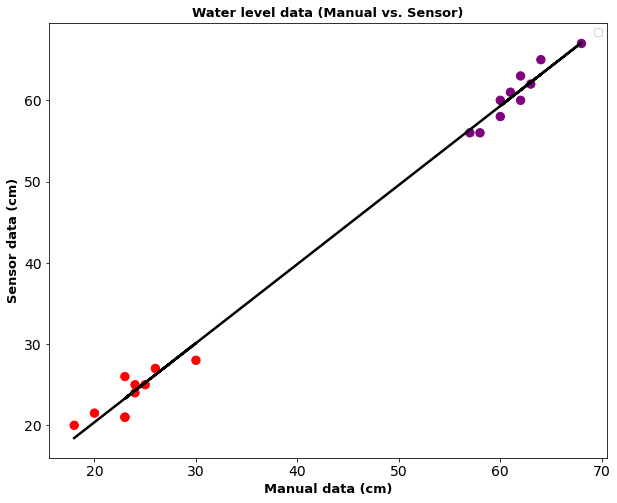

In [24]:
colors = ListedColormap(['red','purple'])
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
#plt.scatter(z,df['MEASURED (CM)'],color='cyan')
plt.scatter(df['MEASURED (CM)'],df['SENSOR (CM)'],s=70,c= df['re'],cmap=colors)
plt.plot(x, a*x+b,linewidth = 2.5,color='black')  
#plt.scatter(df['SENSOR (CM)'],df['MEASURED (CM)'],color = 'cyan')
plt.title('Water level data (Manual vs. Sensor)', fontsize=13, weight = 'bold')
plt.xlabel('Manual data (cm)', fontsize=13, weight = 'bold')
plt.ylabel('Sensor data (cm)', fontsize=13, weight = 'bold')
plt.tick_params(axis='both',labelsize=14,)
plt.tick_params(axis = 'x', labelsize = 14,)
plt.legend()
plt.show()

In [25]:
temp_df = df.loc[(df['re'] == 0)]
temp_df1 = df.loc[(df['re'] == 1)]

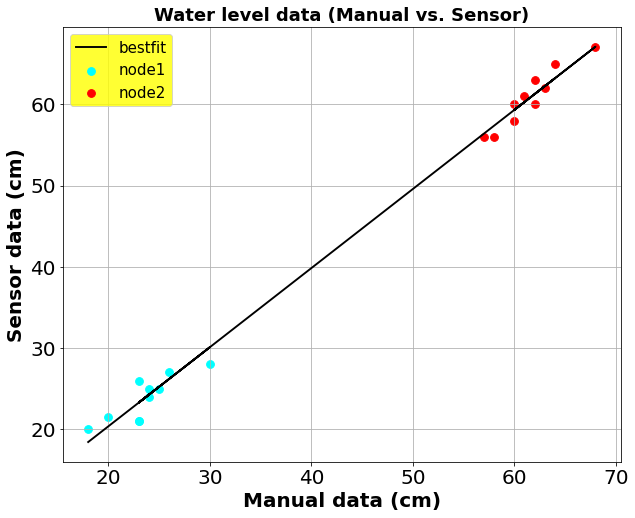

In [30]:
node1 = plt.scatter(temp_df['MEASURED (CM)'],temp_df['SENSOR (CM)'], c ="cyan", marker="o", s = 60)
node2 = plt.scatter(temp_df1['MEASURED (CM)'],temp_df1['SENSOR (CM)'], c ="red",marker ="o", s = 60)
bestfit = plt.plot(x, a*x+b,linewidth = 1.9,color='black')  
#plt.scatter(df['SENSOR (CM)'],df['MEASURED (CM)'],color = 'cyan')
plt.title('Water level data (Manual vs. Sensor)', fontsize=18, weight = 'bold')
plt.xlabel('Manual data (cm)', fontsize=20, weight = 'bold')
plt.ylabel('Sensor data (cm)', fontsize=20, weight = 'bold')
plt.grid()
plt.tick_params(axis='both',labelsize=20,)
plt.tick_params(axis = 'x', labelsize = 20,)
plt.legend(["bestfit", "node1","node2"], loc ="upper left", fancybox=True,facecolor='#FFFF00',prop={'size': 15,  'style': 'normal'})
plt.savefig('fit.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(temp_df['MEASURED (CM)'], temp_df['SENSOR (CM)']))
rmse

1.710263137648707

In [24]:
rmse1 = np.sqrt(mean_squared_error(temp_df1['MEASURED (CM)'], temp_df1['SENSOR (CM)']))
rmse1

1.3038404810405297